In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, classification_report
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

from sklearn.metrics import roc_curve

/home/smithtape/anaconda3/envs/envtwo/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()

api.dataset_download_files('uciml/breast-cancer-wisconsin-data', path='./', unzip=True)


In [3]:
# Load the dataset
data = pd.read_csv('./data.csv')  # please replace path_to_your_file.csv with your actual file path


In [4]:
# Display the first rows of the dataset to see feature names and types
print(data.head())

# Display information about the dataset
print(data.info())

# Check for any missing values in the dataset
print(data.isnull().sum())


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [5]:
# Statistical summary
print(data.describe())


                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

diagnosis
B    357
M    212
Name: count, dtype: int64


/home/smithtape/anaconda3/envs/envtwo/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/smithtape/anaconda3/envs/envtwo/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


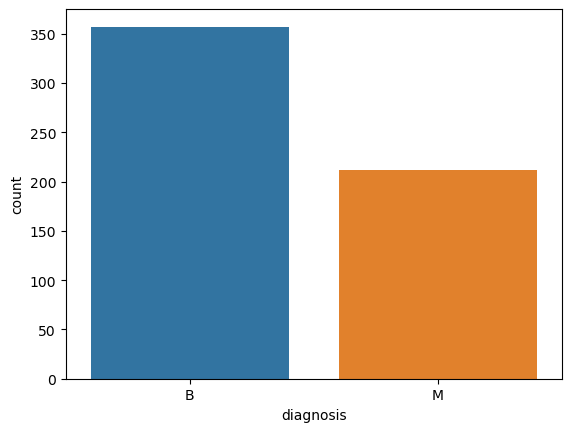

In [6]:
# Convert 'diagnosis' to a category type if it's a string
if data['diagnosis'].dtype == 'object':
    data['diagnosis'] = data['diagnosis'].astype('category')

# Safely count and plot
print(data['diagnosis'].value_counts())

sns.countplot(x='diagnosis', data=data)
plt.show()


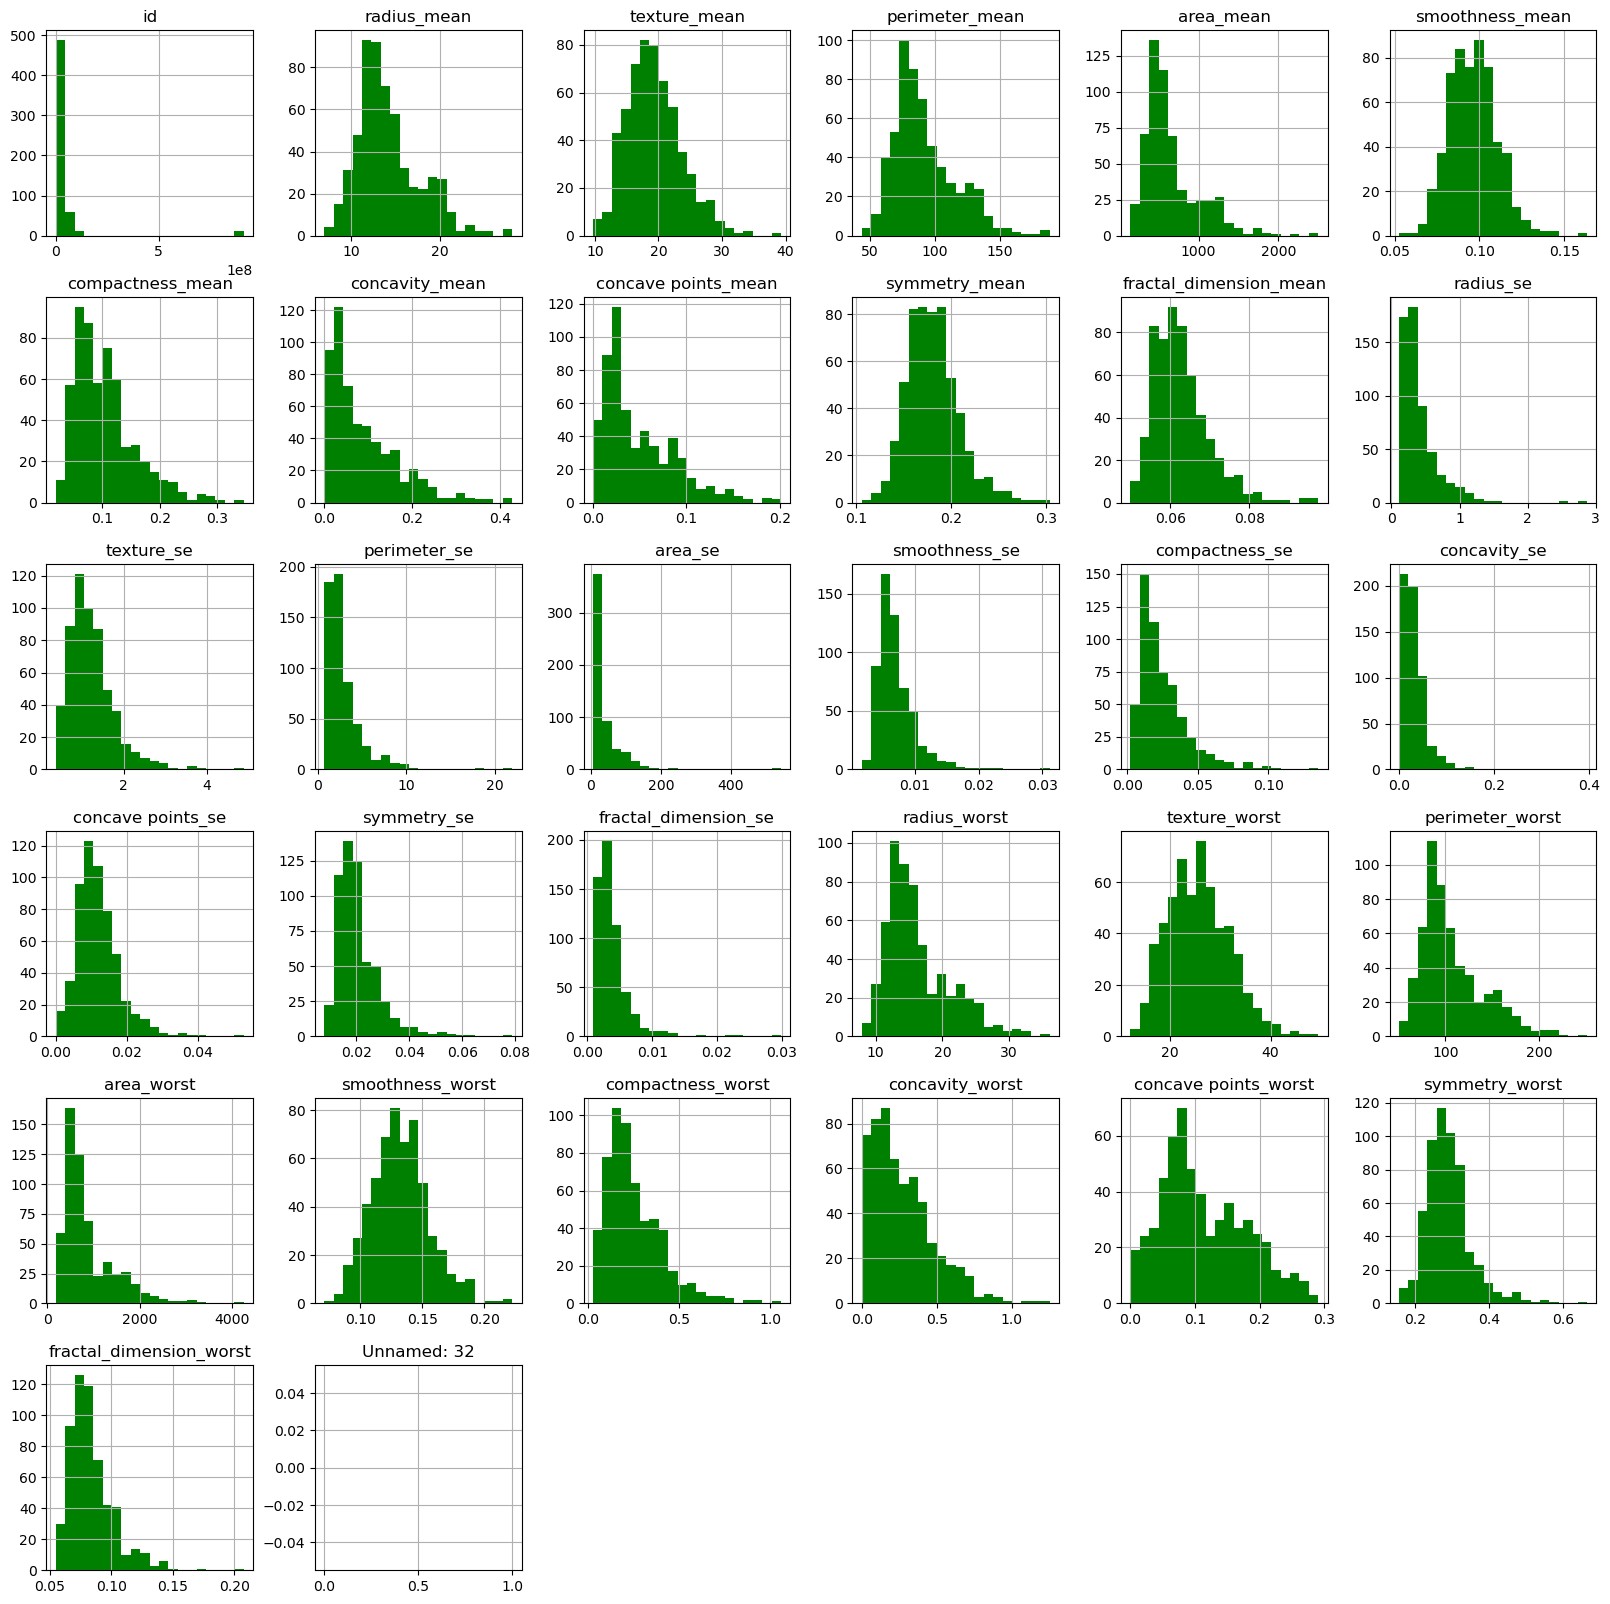

In [7]:
# Plot histograms for each variable
data.hist(bins=20, figsize=(20,20), color = 'g')
plt.show()

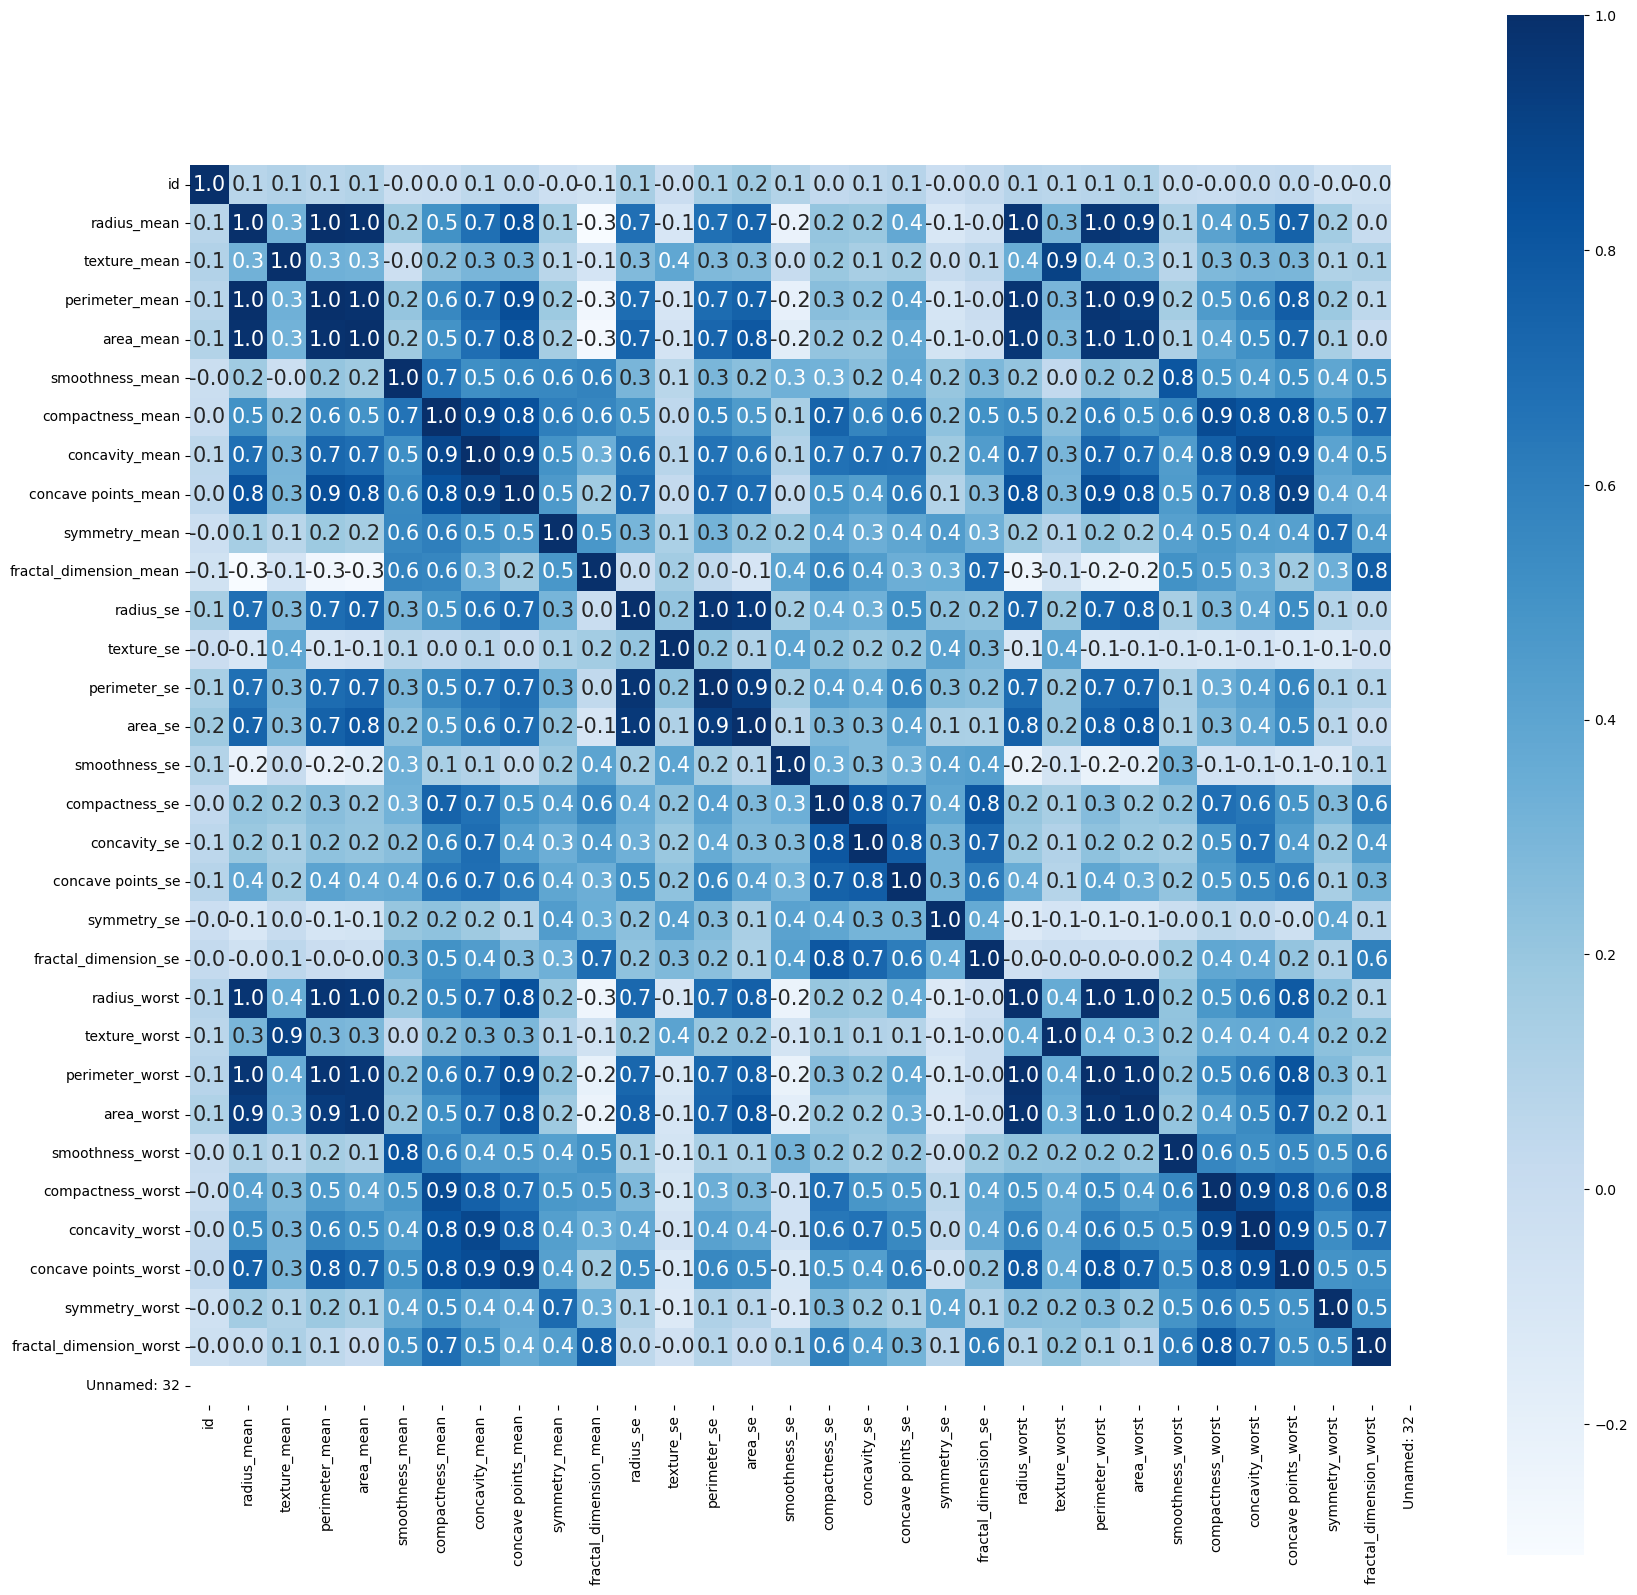

In [8]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Compute the correlation matrix only on numeric features
corr = numeric_data.corr()

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Blues')
plt.show()


In [9]:
# Drop the 'id' column
data = data.drop(columns=['id'])
# Drop the 'Unnamed: 32' column
data = data.drop(columns=['Unnamed: 32'])


Epoch 1/25.. Train loss: 0.530.. Validation loss: 0.341
Epoch 2/25.. Train loss: 0.229.. Validation loss: 0.164
Epoch 3/25.. Train loss: 0.114.. Validation loss: 0.135
Epoch 4/25.. Train loss: 0.082.. Validation loss: 0.124
Epoch 5/25.. Train loss: 0.063.. Validation loss: 0.127
Epoch 6/25.. Train loss: 0.052.. Validation loss: 0.125
Epoch 7/25.. Train loss: 0.040.. Validation loss: 0.128
Epoch 8/25.. Train loss: 0.040.. Validation loss: 0.129
Epoch 9/25.. Train loss: 0.033.. Validation loss: 0.126
Early stopping!


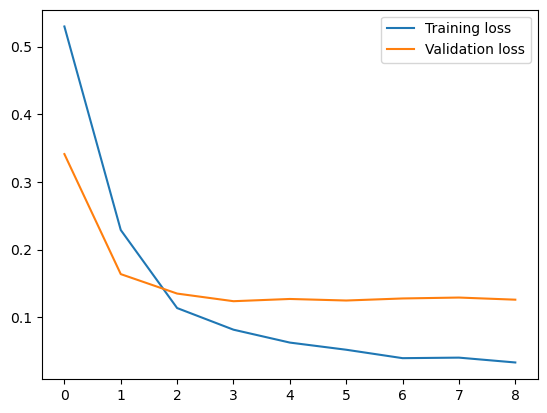

Accuracy: 0.9649122807017544
Confusion Matrix: 
[[68  3]
 [ 1 42]]
Precision: 0.9333333333333333
Recall: 0.9767441860465116
F1 Score: 0.9545454545454545
AUC-ROC: 0.9977071732721913
Cross Entropy Loss: 0.06044850870966911


In [10]:
# 'diagnosis' is the target variable and the rest are features.
X = data.drop('diagnosis', axis=1).values
y = data['diagnosis'].apply(lambda x: 1 if x.strip().lower() == 'm' else 0).values

# Split the dataset into training, validation, and test sets (60%, 20%, 20%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Create TensorDatasets and DataLoader
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_dataset = TensorDataset(X_val, y_val)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

# Define the neural network
class Net(nn.Module):
    def __init__(self, n_features):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(n_features, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.sigmoid(self.fc3(x))
        return x

# Determine the number of features
n_features = X_train.shape[1]

# Initialize the network, loss function and optimizer
model = Net(n_features)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Add an early stopping mechanism
epochs_no_improve = 0
n_epochs_stop = 5  # specifies how many epochs without improvement to wait
min_val_loss = np.Inf

# Train the network
def train_model(model, criterion, optimizer, train_loader, val_loader, epochs=25):
    train_losses, val_losses = [], []

    global epochs_no_improve, min_val_loss  # declare these variables as global
    
    for epoch in range(epochs):
        model.train()
        train_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            output = model(inputs)
            loss = criterion(output.squeeze(), labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * inputs.size(0)

        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, labels in val_loader:
                output = model(inputs)
                loss = criterion(output.squeeze(), labels)
                val_loss += loss.item() * inputs.size(0)

        train_loss = train_loss / len(train_loader.dataset)
        val_loss = val_loss / len(val_loader.dataset)
        train_losses.append(train_loss)
        val_losses.append(val_loss)

        print(f'Epoch {epoch+1}/{epochs}.. '
              f'Train loss: {train_loss:.3f}.. '
              f'Validation loss: {val_loss:.3f}')
        
        # Early stopping logic
        if val_loss < min_val_loss:
            epochs_no_improve = 0
            min_val_loss = val_loss
        else:
            epochs_no_improve += 1
            if epochs_no_improve == n_epochs_stop:
                print('Early stopping!')
                return train_losses, val_losses

    return train_losses, val_losses

train_losses, val_losses = train_model(model, criterion, optimizer, train_loader, val_loader, epochs=25)

# Plot training/validation loss
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.legend()
plt.show()

# Evaluation on test set
model.eval()
with torch.no_grad():
    output = model(X_test)
    preds = output.squeeze().round()
    acc = accuracy_score(y_test, preds)
    conf_mat = confusion_matrix(y_test, preds)
    prec = precision_score(y_test, preds)
    rec = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    auc = roc_auc_score(y_test, output.squeeze())
    test_loss = criterion(output.squeeze(), y_test)

print(f'Accuracy: {acc}')
print(f'Confusion Matrix: \n{conf_mat}')
print(f'Precision: {prec}')
print(f'Recall: {rec}')
print(f'F1 Score: {f1}')
print(f'AUC-ROC: {auc}')
print(f'Cross Entropy Loss: {test_loss}')


/tmp/ipykernel_5150/427336757.py:9: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1656352660876/work/torch/csrc/utils/tensor_new.cpp:201.)
  y_prob = torch.tensor(y_prob).squeeze().detach().numpy()


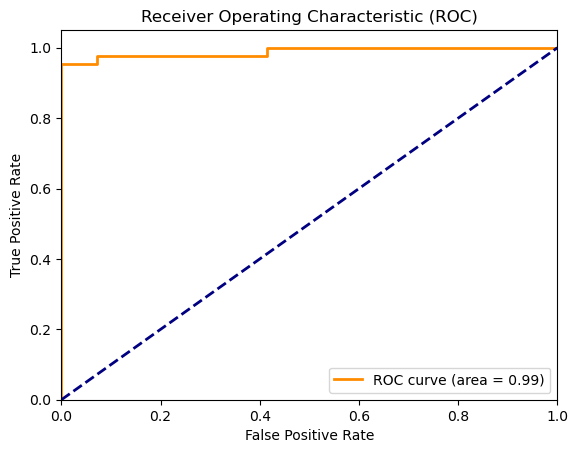

In [11]:
# Evaluation on test set
model.eval()
y_prob = []
with torch.no_grad():
    for inputs, labels in val_loader:
        output = model(inputs)
        y_prob.extend(output.numpy())

y_prob = torch.tensor(y_prob).squeeze().detach().numpy()
y_val_np = y_val.numpy()

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_val_np, y_prob)

# Compute ROC AUC
roc_auc = roc_auc_score(y_val_np, y_prob)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

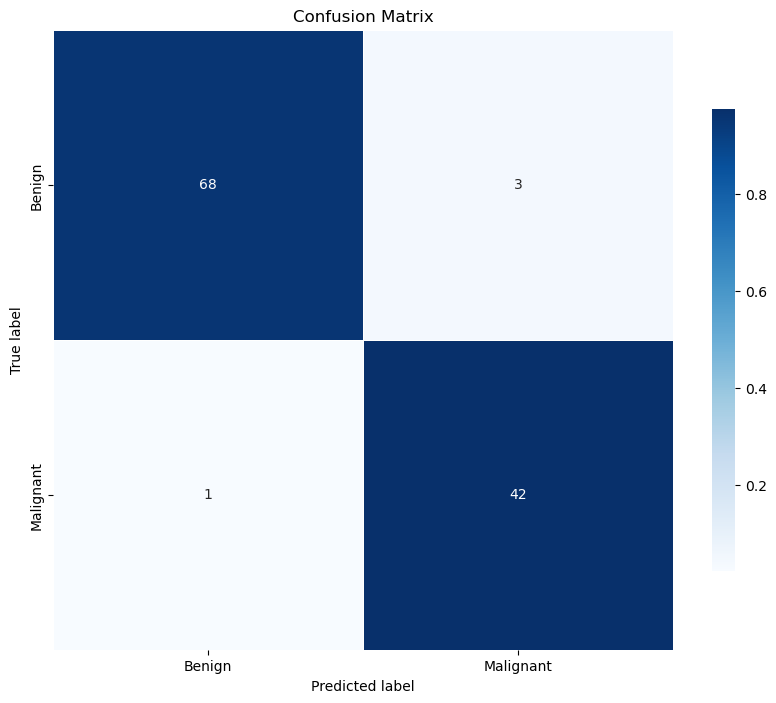

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # normalize

    fig, ax = plt.subplots(figsize=(10, 10))
    
    sns.heatmap(cm_norm, annot=cm, fmt='g', cmap=cmap, 
                square=True, linewidths=.5, cbar_kws={"shrink": 0.6},
                xticklabels=classes, yticklabels=classes)

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title(title)
    plt.show()

# Get predictions for test set
model.eval()
with torch.no_grad():
    output = model(X_test)
    y_pred = (output > 0.5).numpy()

# Plot beautiful confusion matrix
plot_confusion_matrix(y_test.numpy(), y_pred, classes=['Benign', 'Malignant'])
